# Create a custom simulation for the DRC

## 1. Import required packages

In [1]:
import covasim as cv
import numpy as np

Covasim 2.0.2 (2020-02-01) — © 2021 by IDM


## 2. Define parameters and country for base model

In [2]:
pars = dict(
    pop_type = 'hybrid', # see documentation - this is a hybrid between random and a data derived model. Later, develop synthpop
    pop_size = 100e3,  # population of the DRC is 87 million. Note that when I despecify this, it goes down to 20,000 people 
    pop_scale= 870, # one agent represents 200 people 
    location = 'Democratic Republic of the Congo',
    start_day = '2020-03-01',
    end_day = '2020-06-30',
    contacts= dict(h=4, s=5, w=4, c=6),
    verbose = 0 # means it won't print all the output 
)


# other things you can re-define in pars include n_days, beta  (As below)

## 3. Take a look at population characteristics from input data (of country (location) as defined above)

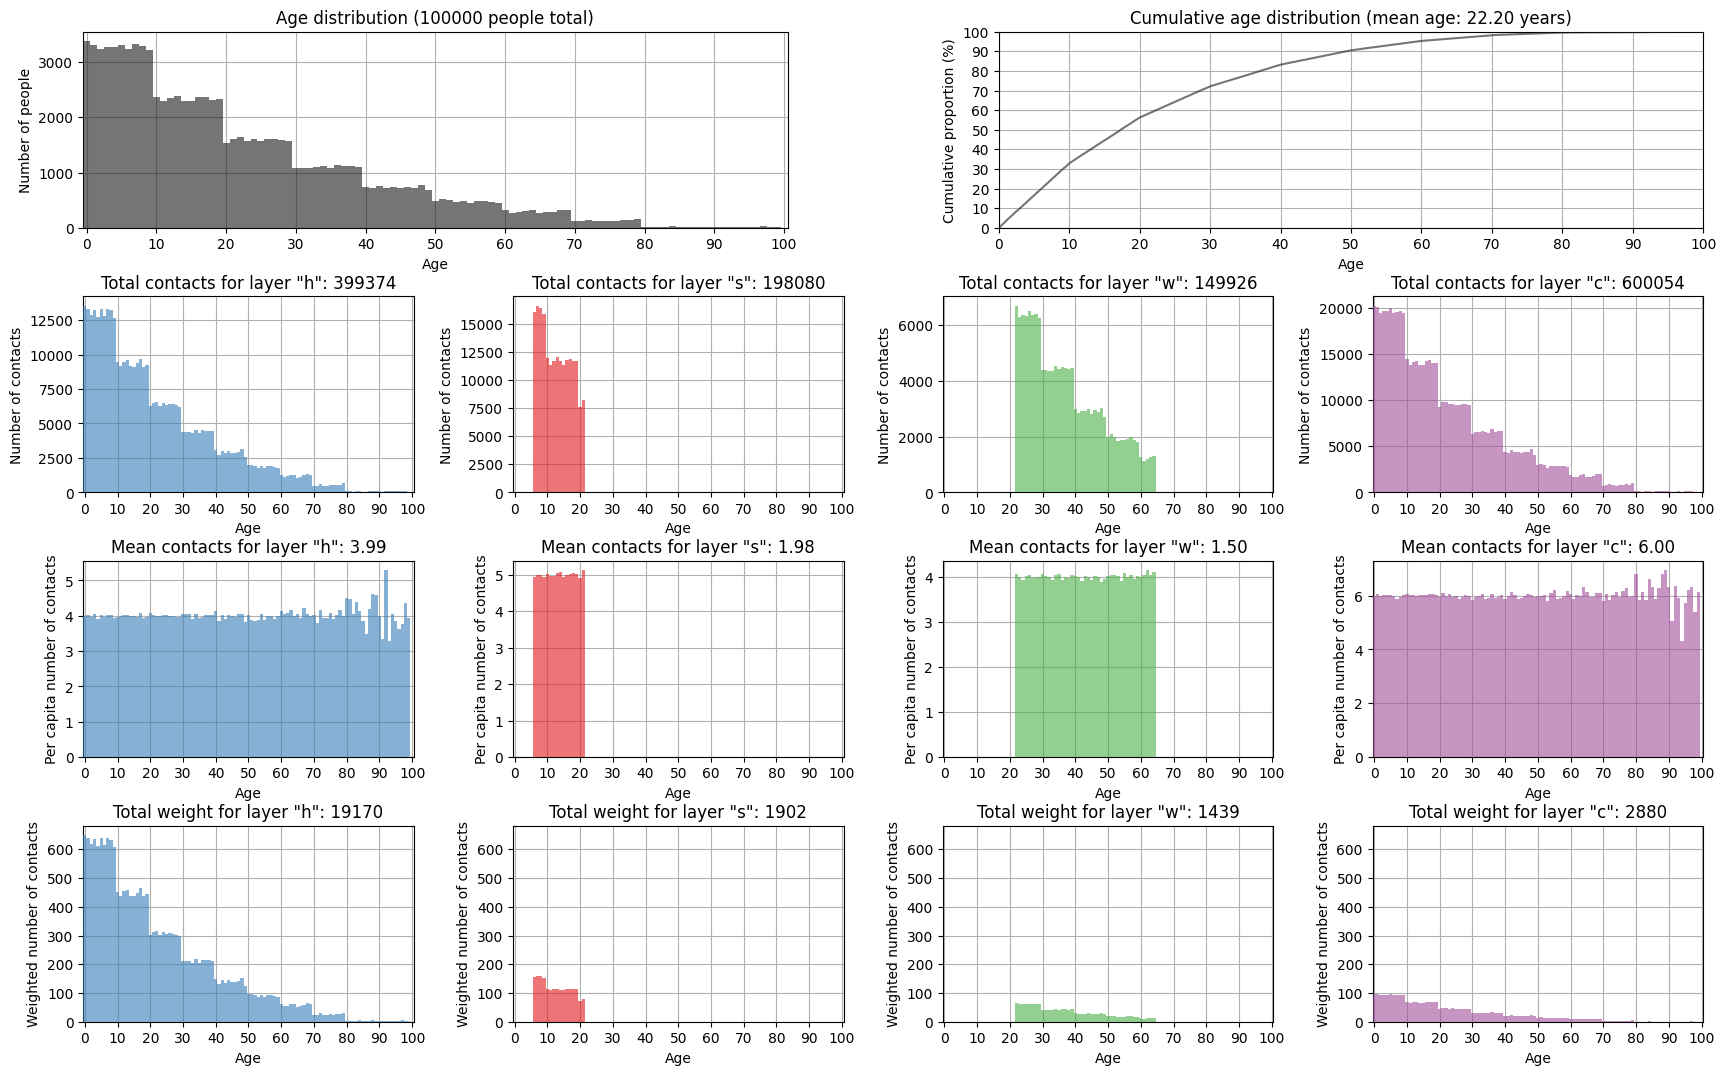

In [3]:
cv.options.set(dpi=100, show=False, close=True) #, verbose=0 # ) # put back in verbose once i've figured out what this does

# change the transmission rate (default beta value is 0.016?)
cb = cv.change_beta(days=['2020-03-01'], changes=[0.2]) 
# date that lockdown was imposed -- but would need to see how it impacted case numbers and compare
#sim = cv.Sim(pars, interventions=cb, label='With beta changes') # interventions=cb, label='With changes in RO from 6th April'
sim = cv.Sim(pars)

sim.initialize()
fig = sim.people.plot()

## 4. Run base simulation

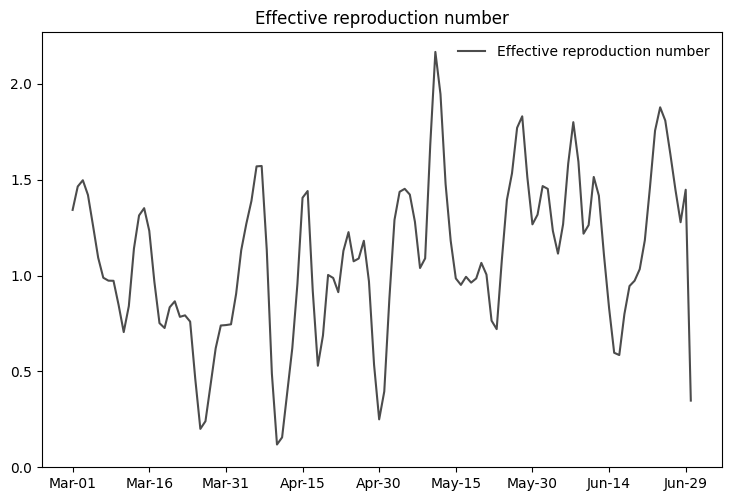

In [4]:
# just take a look at how changing beta changes the trajectory 
sim.run()
sim.plot_result('r_eff')

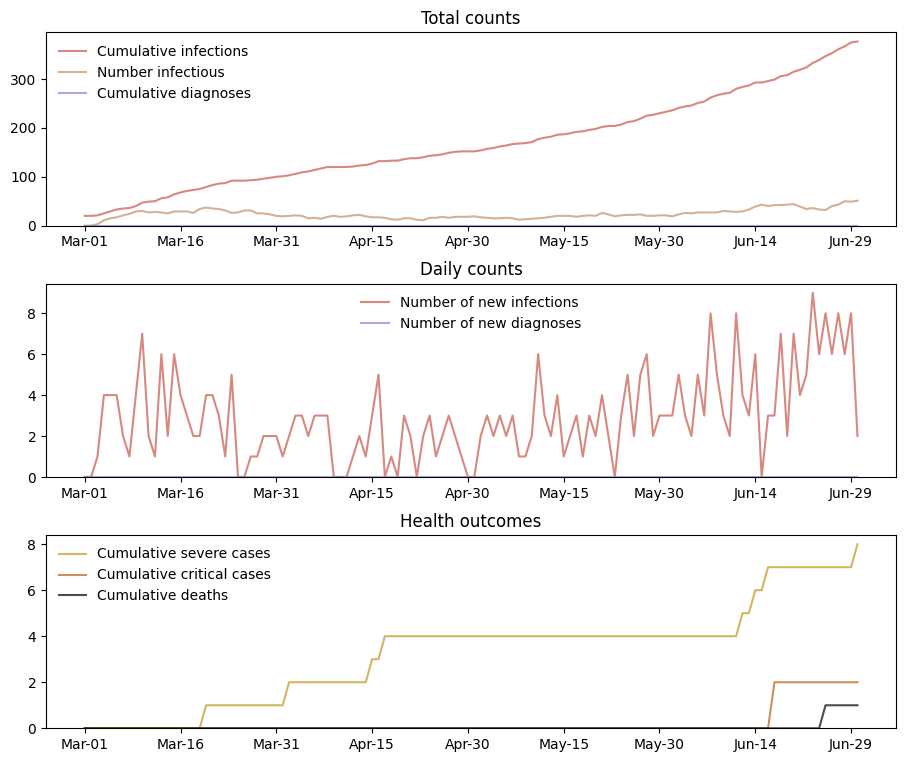

In [5]:
scenariofig = sim.plot()  
sim.plot()

In [7]:

sim.save('outputs/drc_polymod_contacts.sim')
sim.to_excel('outputs/drc_polymod_contacts.sim.xlsx')


Object saved to /Users/sophieayling/Documents/GitHub/covasim/docs/DRC/outputs/drc_polymod_contacts.sim.xlsx.
